In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset 1: Prices of S&P stocks from Feb 2013 to Dec 2018
StockPrices = pd.read_csv('all_stocks_5yr.csv', parse_dates=['date'])


print(StockPrices.shape[0] - StockPrices.count())
print(StockPrices.dtypes)

StockPrices = StockPrices[(StockPrices['date'] >= '2013-02-01') & (StockPrices['date'] <= '2017-12-31')]
print(StockPrices.head())
print(StockPrices.tail())
StockPrices.info()

#Number of stocks in S&P index
No_of_stocks = len(StockPrices['Name'].unique())
print("Number of stocks:", No_of_stocks)

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object
        date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
             date   open   high    low  close   volume Name
619009 2017-12-22  72.30  72.37  71.79  71.99  1345683  ZTS
619010 2017-12-26  72.40  72.55  71.90  72.34   792134  ZTS
619011 2017-12-27  72.59  72.69  72.25  72.45  1159771  ZTS
619012 2017-12-28  72.49  72.60  72.14  72.39   710499  ZTS
619013 2017-12-29  72.55  72.76  72.04  72.04  1704122  ZTS
<class 'pan

The dataframe StockPrices contains the close price and volume of 505 S&P stocks for the period starting from 8th February 2013 to 29th December 2017. It can be seen that there are no missing values.

In [2]:
#Renaming the column 'symbol' of StockPrices as 'Ticker symbol'
StockPrices = StockPrices.rename(index=str, columns = {"Name" : "Ticker symbol"})
print(StockPrices.head())

        date   open   high    low  close    volume Ticker symbol
0 2013-02-08  15.07  15.12  14.63  14.75   8407500           AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000           AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000           AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500           AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900           AAL


Replaced the column name, 'Name' to 'Ticker symbol', so that it can be merged with another data frame containing name and sector of stocks.

In [4]:
#Dataset 2: importing another data set containing the names of the companies and the sector to which they belong
Securities = pd.read_csv('securities.csv')
print(Securities.head())

print(Securities.info())

#Checking number of securities in the 2nd dataset
No_of_securities = len(Securities['Ticker symbol'].unique())
print(No_of_securities)

  Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV               AbbVie     reports             Health Care   
3           ACN        Accenture plc     reports  Information Technology   
4          ATVI  Activision Blizzard     reports  Information Technology   

                GICS Sub Industry   Address of Headquarters Date first added  \
0        Industrial Conglomerates       St. Paul, Minnesota              NaN   
1           Health Care Equipment   North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals   North Chicago, Illinois       2012-12-31   
3  IT Consulting & Other Services           Dublin, Ireland       2011-07-06   
4     Home Entertainment Software  Santa Monica, California       2015-08-31   

       CIK  
0    66740  
1     1800  
2  1551152  
3  1467373

Dataframe 'Securities' contains the name and sector, in addition to other information, of 505 stocks.

In [4]:
#Dataset 3, a subset of Dataset 2: Selecting specific required columns from Securities (Dataset 2)


  Ticker symbol             Security             GICS Sector
0           MMM           3M Company             Industrials
1           ABT  Abbott Laboratories             Health Care
2          ABBV               AbbVie             Health Care
3           ACN        Accenture plc  Information Technology
4          ATVI  Activision Blizzard  Information Technology


Only three required columns are retained and others are dropped from the dataframe 'Securities'.

In [7]:
#Dataset 4: Merging StockPrices and Securities based on common column 'Ticker symbol'
Merged_StockPrices = pd.merge(StockPrices, Securities, on='Ticker symbol')
Merged_StockPrices = Merged_StockPrices.drop(columns = {'SEC filings', 'CIK'})
print(Merged_StockPrices.head())
#print(Merged_StockPrices.tail()) 

        date   open   high    low  close    volume Ticker symbol  \
0 2013-02-08  15.07  15.12  14.63  14.75   8407500           AAL   
1 2013-02-11  14.89  15.01  14.26  14.46   8882000           AAL   
2 2013-02-12  14.45  14.51  14.10  14.27   8126000           AAL   
3 2013-02-13  14.30  14.94  14.25  14.66  10259500           AAL   
4 2013-02-14  14.94  14.96  13.16  13.99  31879900           AAL   

                  Security  GICS Sector GICS Sub Industry  \
0  American Airlines Group  Industrials          Airlines   
1  American Airlines Group  Industrials          Airlines   
2  American Airlines Group  Industrials          Airlines   
3  American Airlines Group  Industrials          Airlines   
4  American Airlines Group  Industrials          Airlines   

  Address of Headquarters Date first added  
0       Fort Worth, Texas       2015-03-23  
1       Fort Worth, Texas       2015-03-23  
2       Fort Worth, Texas       2015-03-23  
3       Fort Worth, Texas       2015-03-23  

The two dataframes, 'StockPrices' and 'Securities' are merged on the common column named 'Ticker symbol'.

In [12]:
Merged_StockPrices = Merged_StockPrices[(Merged_StockPrices['Date first added'] <= '2015-0-01')]
Merged_StockPrices.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 253313 entries, 1233 to 571006
Data columns (total 12 columns):
date                       253313 non-null datetime64[ns]
open                       253313 non-null float64
high                       253313 non-null float64
low                        253313 non-null float64
close                      253313 non-null float64
volume                     253313 non-null int64
Ticker symbol              253313 non-null object
Security                   253313 non-null object
GICS Sector                253313 non-null object
GICS Sub Industry          253313 non-null object
Address of Headquarters    253313 non-null object
Date first added           253313 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 25.1+ MB


In [13]:
Merged_StockPrices.info()
name_of_sectors = Merged_StockPrices['GICS Sector'].unique()
print(name_of_sectors)
print(len(name_of_sectors))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253313 entries, 1233 to 571006
Data columns (total 12 columns):
date                       253313 non-null datetime64[ns]
open                       253313 non-null float64
high                       253313 non-null float64
low                        253313 non-null float64
close                      253313 non-null float64
volume                     253313 non-null int64
Ticker symbol              253313 non-null object
Security                   253313 non-null object
GICS Sector                253313 non-null object
GICS Sub Industry          253313 non-null object
Address of Headquarters    253313 non-null object
Date first added           253313 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 25.1+ MB
['Information Technology' 'Health Care' 'Consumer Staples' 'Utilities'
 'Financials' 'Real Estate' 'Consumer Discretionary' 'Materials'
 'Industrials' 'Energy' 'Telecommunications Services']
11

The merged dataframe 'Merged_StockPrices' contains 574706 non-null values. The S&P stocks are divided in to 11 unique sectors.

# Creating dataframe for each sector and finding the average daily return for each sector and also the top 5 performing stocks in each sector

25
Security
BlackRock                 0.644745
PNC Financial Services    0.267874
Lincoln National          0.130745
Marsh & McLennan          0.100206
JPMorgan Chase & Co.      0.098967
Name: Returns, dtype: float64
Average daily return of Financial sector: 0.06307296744188182 %


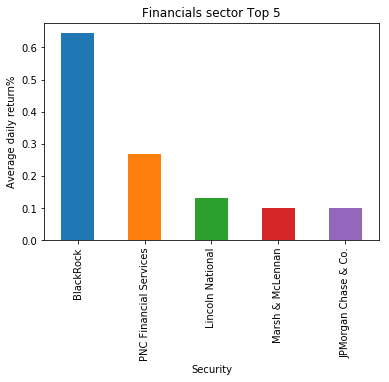

In [14]:
#Creating a dataframe containing Financials stocks

Financials = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Financials'].copy()
Financials = Financials.drop(columns = 'GICS Sector')

#Finding the number of unique stocks
print(len(Financials['Ticker symbol'].unique()))

#Calculating 1-day return
Financials['Returns'] = Financials['close'].pct_change()
Financials = Financials.dropna() 

#Calculating mean of 1-day returns for each stock and selecting 5 stocks with highest mean return                           
Financials_returns = (Financials.groupby('Security')['Returns'].mean())*100
Financials_returns_5 = Financials_returns.nlargest(5)
print(Financials_returns_5)
Financials_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average daily return%')
plt.title("Financials sector Top 5")
print("Average daily return of Financial sector:", Financials_returns.mean(), "%")

There are 64 stocks in Financials sector. The mean daily return of the sector is 0.048%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are  Goldman Sachs Group, BlackRock,Willis Towers Watson, NASDAQ OMX Group and Lincoln National.

66
Security
Grainger (W.W.) Inc.      0.942774
Acuity Brands Inc         0.220633
Northrop Grumman Corp.    0.196531
3M Company                0.180336
TransDigm Group           0.154249
Name: Returns, dtype: float64
Average daily return of Industrials sector: 0.05438148303628136 %


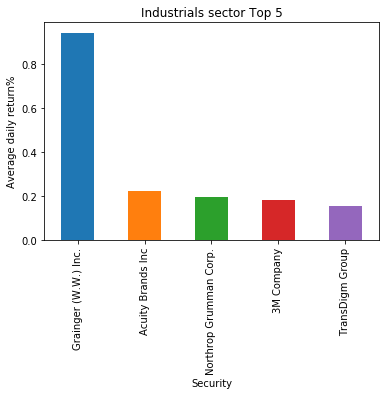

In [8]:
#Creating a dataframe containing Industrials stocks

Industrials = Merged_StockPrices.loc[Merged_StockPrices['GICS Sector'] == 'Industrials'].copy()
Industrials = Industrials.drop(columns = 'GICS Sector')

#Finding the number of unique stocks
print(len(Industrials['Ticker symbol'].unique()))

#Calculating 1-day return
Industrials['Returns'] = Industrials['close'].pct_change()
Industrials = Industrials.dropna()

#Calculating mean of 1-day returns for each stock and selecting 5 stocks with highest mean return
Industrials_returns = (Industrials.groupby('Security')['Returns'].mean())*100
Industrials_returns_5 = Industrials_returns.nlargest(5)
print(Industrials_returns_5)
Industrials_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average daily return%')
plt.title("Industrials sector Top 5")
print("Average daily return of Industrials sector:", Industrials_returns.mean(), "%")

There are 66 stocks in Industrials sector. The mean daily return of the sector is 0.054%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Grainger (W.W.) Inc., Acuity Brands Inc, Northrop Grumman Corp., 3M Company and TransDigm Group.

64
Security
Alphabet Inc Class A    1.004740
Harris Corporation      0.196638
Nvidia Corporation      0.184013
Netflix Inc.            0.169018
Facebook                0.147534
Name: Returns, dtype: float64
Average daily return of Information Technology sector: 0.06030166649664005 %


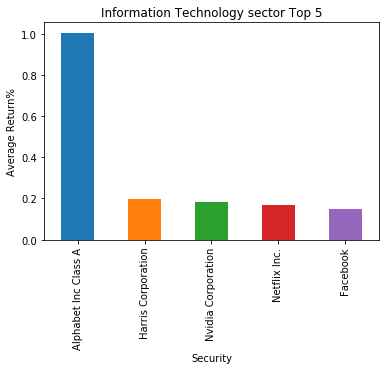

In [9]:
#Creating a dataframe containing Information Technology stocks

Information_Technology = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Information Technology'].copy()
Information_Technology = Information_Technology.drop(columns = 'GICS Sector')

print(len(Information_Technology['Ticker symbol'].unique()))

Information_Technology['Returns'] = Information_Technology['close'].pct_change()
Information_Technology = Information_Technology.dropna()

Information_Technology_returns = (Information_Technology.groupby('Security')['Returns'].mean())*100
Information_Technology_returns_5 = Information_Technology_returns.nlargest(5)
print(Information_Technology_returns_5)
Information_Technology_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Information Technology sector Top 5")
print("Average daily return of Information Technology sector:", Information_Technology_returns.mean(), "%")

There are 64 stocks in Information Technology sector. The mean daily return of the sector is 0.06%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Alphabet Inc Class A    
Harris Corporation, Nvidia Corporation, Netflix Inc. and Facebook.

77
Security
Ulta Salon Cosmetics & Fragrance Inc    0.611565
Chipotle Mexican Grill                  0.578257
McDonald's Corp.                        0.471811
Amazon.com Inc                          0.269884
Home Depot                              0.269250
Name: Returns, dtype: float64
Average daily return of Consumer Discretionary sector: 0.06569884566667701 %


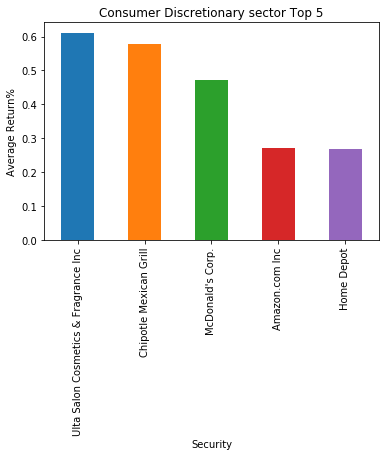

In [10]:
#Creating a dataframe containing Consumer Discretionary stocks

Consumer_Discretionary = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Consumer Discretionary'].copy()
Consumer_Discretionary = Consumer_Discretionary.drop(columns = 'GICS Sector')

print(len(Consumer_Discretionary['Ticker symbol'].unique()))

Consumer_Discretionary['Returns'] = Consumer_Discretionary['close'].pct_change()
Consumer_Discretionary = Consumer_Discretionary.dropna()

Consumer_Discretionary_returns = (Consumer_Discretionary.groupby('Security')['Returns'].mean())*100
Consumer_Discretionary_returns_5 = Consumer_Discretionary_returns.nlargest(5)
print(Consumer_Discretionary_returns_5)
Consumer_Discretionary_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Consumer Discretionary sector Top 5")
print("Average daily return of Consumer Discretionary sector:", Consumer_Discretionary_returns.mean(), "%")

There are 77 stocks in Consumer Discretionary sector. The mean daily return of the sector is 0.065%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Ulta Salon Cosmetics & Fragrance Inc, Chipotle Mexican Grill, McDonald's Corp., Amazon.com Inc and Home Depot. 

56
Security
Mettler Toledo          0.330625
Regeneron               0.165431
Humana Inc.             0.117365
Edwards Lifesciences    0.116772
Becton Dickinson        0.107125
Name: Returns, dtype: float64
Average daily return of Health care sector: 0.03927112855081101 %


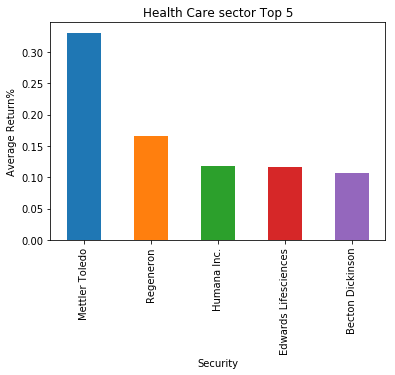

In [11]:
#Creating a dataframe containing Health Care stocks

Health_Care = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Health Care'].copy()
Health_Care = Health_Care.drop(columns = 'GICS Sector')

print(len(Health_Care['Ticker symbol'].unique()))

Health_Care['Returns'] = Health_Care['close'].pct_change()
Health_Care = Health_Care.dropna()

Health_Care_returns = (Health_Care.groupby('Security')['Returns'].mean())*100
Health_Care_returns_5 = Health_Care_returns.nlargest(5)
print(Health_Care_returns_5)
Health_Care_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Health Care sector Top 5")
print("Average daily return of Health care sector:", Health_Care_returns.mean(), "%")

There are 56 stocks in Health Care sector. The mean daily return of the sector is 0.039%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Mettler Toledo, Regeneron, Humana Inc., Edwards Lifesciences and Becton Dickinson.

34
Security
The Hershey Company     0.132590
Constellation Brands    0.112580
Kellogg Co.             0.110171
The Clorox Company      0.103416
Campbell Soup           0.100398
Name: Returns, dtype: float64
Average daily return of Consumer Staples sector: 0.03298706230618422 %


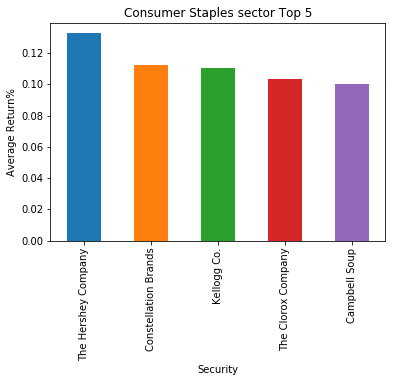

In [12]:
#Creating a dataframe containing Consumer Staples stocks

Consumer_Staples = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Consumer Staples'].copy()
Consumer_Staples = Consumer_Staples.drop(columns = 'GICS Sector')

print(len(Consumer_Staples['Ticker symbol'].unique()))

Consumer_Staples['Returns'] = Consumer_Staples['close'].pct_change()
Consumer_Staples = Consumer_Staples.dropna()

Consumer_Staples_returns = (Consumer_Staples.groupby('Security')['Returns'].mean())*100
Consumer_Staples_returns_5 = Consumer_Staples_returns.nlargest(5)
print(Consumer_Staples_returns_5)
Consumer_Staples_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Consumer Staples sector Top 5")
print("Average daily return of Consumer Staples sector:", Consumer_Staples_returns.mean(), "%")

There are 34 stocks in Consumer Staples sector. The mean daily return of the sector is 0.032%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are The Hershey Company, Constellation Brands, Kellogg Co., The Clorox Company and Campbell Soup. 

28
Security
American Water Works Company Inc    0.286268
DTE Energy Co.                      0.150894
NextEra Energy                      0.124125
Sempra Energy                       0.080584
Alliant Energy Corp                 0.075595
Name: Returns, dtype: float64
Average daily return of Utilities sector: 0.031105419979867484 %


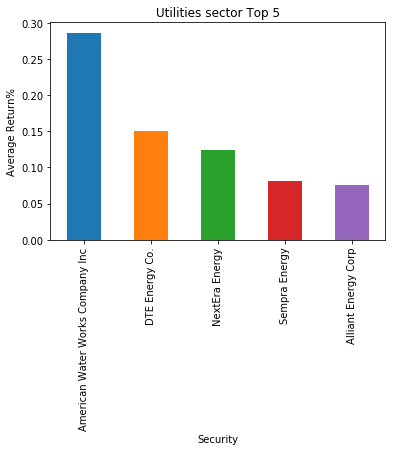

In [13]:
#Creating a dataframe containing Utilities stocks

Utilities = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Utilities'].copy()
Utilities = Utilities.drop(columns = 'GICS Sector')

print(len(Utilities['Ticker symbol'].unique()))

Utilities['Returns'] = Utilities['close'].pct_change()
Utilities = Utilities.dropna()

Utilities_returns = (Utilities.groupby('Security')['Returns'].mean())*100
Utilities_returns_5 = Utilities_returns.nlargest(5)
print(Utilities_returns_5)
Utilities_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Utilities sector Top 5")
print("Average daily return of Utilities sector:", Utilities_returns.mean(), "%")

There are 28 stocks in Utilities sector. The mean daily return of the sector is 0.03%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are American Water Works Company Inc, DTE Energy Co., NextEra Energy, Sempra Energy and Alliant Energy Corp.

29
Security
Mid-America Apartments        0.256033
Essex Property Trust, Inc.    0.155955
Public Storage                0.146110
Welltower Inc.                0.144932
Equinix                       0.144286
Name: Returns, dtype: float64
Average daily return of Real Estate sector: 0.039570534269396634 %


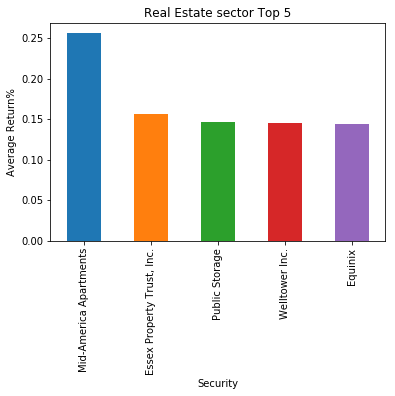

In [14]:
#Creating a dataframe containing Real Estate stocks

Real_Estate = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Real Estate'].copy()
Real_Estate = Real_Estate.drop(columns = 'GICS Sector')

print(len(Real_Estate['Ticker symbol'].unique()))

Real_Estate['Returns'] = Real_Estate['close'].pct_change()
Real_Estate = Real_Estate.dropna()

Real_Estate_returns = (Real_Estate.groupby('Security')['Returns'].mean())*100
Real_Estate_returns_5 = Real_Estate_returns.nlargest(5)
print(Real_Estate_returns_5)
Real_Estate_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Real Estate sector Top 5")
print("Average daily return of Real Estate sector:", Real_Estate_returns.mean(), "%")

There are 29 stocks in Real Estate sector. The mean daily return of the sector is 0.06%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Alphabet Inc Class A    
Harris Corporation, Nvidia Corporation, Netflix Inc. and Facebook

23
Security
Sherwin-Williams                    0.271428
FMC Corporation                     0.225406
Ecolab Inc.                         0.114549
Newmont Mining Corp. (Hldg. Co.)    0.078331
Martin Marietta Materials           0.073422
Name: Returns, dtype: float64
Average daily return of Materials sector: 0.04204711414581008 %


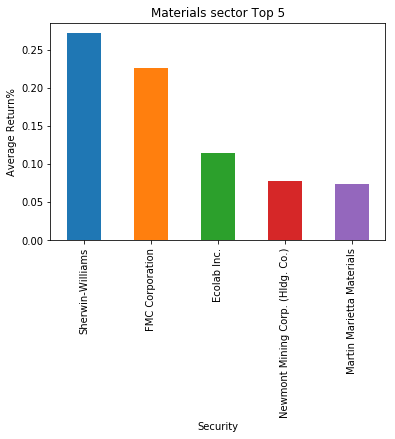

In [15]:
#Creating a dataframe containing Materials stocks

Materials = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Materials'].copy()
Materials = Materials.drop(columns = 'GICS Sector')

print(len(Materials['Ticker symbol'].unique()))

Materials['Returns'] = Materials['close'].pct_change()
Materials = Materials.dropna()

Materials_returns = (Materials.groupby('Security')['Returns'].mean())*100
Materials_returns_5 = Materials_returns.nlargest(5)
print(Materials_returns_5)
Materials_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Materials sector Top 5")
print("Average daily return of Materials sector:", Materials_returns.mean(), "%")

There are 23 stocks in Materials sector. The mean daily return of the sector is 0.042%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Sherwin-Williams, FMC Corporation, Ecolab Inc., Newmont Mining Corp. (Hldg. Co.) and Martin Marietta Materials.

30
Security
Cabot Oil & Gas       0.507964
Schlumberger Ltd.     0.292156
Cimarex Energy        0.169236
Marathon Petroleum    0.165195
Noble Energy Inc      0.163158
Name: Returns, dtype: float64
Average daily return of Energy sector: 0.05709942640992203 %


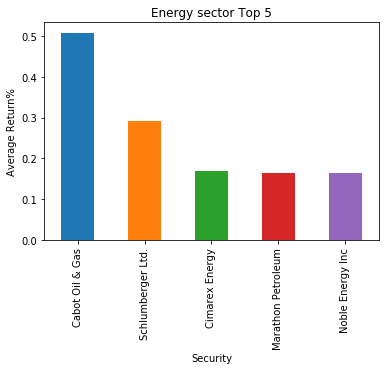

In [16]:
#Creating a dataframe containing Energy stocks

Energy = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Energy'].copy()
Energy = Energy.drop(columns = 'GICS Sector')

print(len(Energy['Ticker symbol'].unique()))

Energy['Returns'] = Energy['close'].pct_change()
Energy = Energy.dropna()

Energy_returns = (Energy.groupby('Security')['Returns'].mean())*100
Energy_returns_5 = Energy_returns.nlargest(5)
print(Energy_returns_5)
Energy_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Energy sector Top 5")
print("Average daily return of Energy sector:", Energy_returns.mean(), "%")

There are 30 stocks in Energy sector. The mean daily return of the sector is 0.057%. The top 5 stocks, in terms of highest average daily return over the selected period(Feb 2013 to Dec 2017), are Cabot Oil & Gas, Schlumberger Ltd., Cimarex Energy, Marathon Petroleum and Noble Energy Inc.

3
Security
AT&T Inc                  0.103137
Verizon Communications    0.031031
CenturyLink Inc          -0.056292
Name: Returns, dtype: float64
Average daily return of Telecommunication services sector: 0.025958747596748294 %


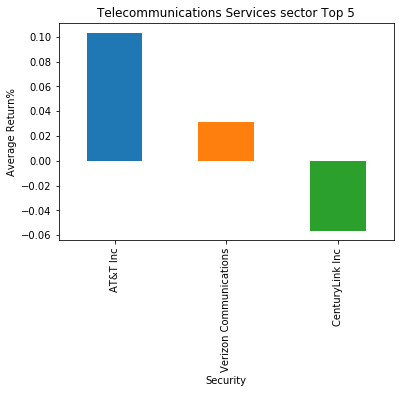

In [17]:
#Creating a dataframe containing Telecommunications Services stocks

Telecommunications_Services = Merged_StockPrices[Merged_StockPrices['GICS Sector'] == 'Telecommunications Services'].copy()
Telecommunications_Services = Telecommunications_Services.drop(columns = 'GICS Sector')

print(len(Telecommunications_Services['Ticker symbol'].unique()))

Telecommunications_Services['Returns'] = Telecommunications_Services['close'].pct_change()
Telecommunications_Services = Telecommunications_Services.dropna()

Telecommunications_Services_returns = (Telecommunications_Services.groupby('Security')['Returns'].mean())*100
Telecommunications_Services_returns_5 = Telecommunications_Services_returns.nlargest(5)
print(Telecommunications_Services_returns_5)
Telecommunications_Services_returns_5.plot.bar()
plt.xlabel('Security')
plt.ylabel('Average Return%')
plt.title("Telecommunications Services sector Top 5")
print("Average daily return of Telecommunication services sector:", Telecommunications_Services_returns.mean(), "%")

There are only 3 stocks in Telecommunication services sector. The mean daily return of the sector is 0.025%. The 2 stocks that gave positive average daily return over the selected period(Feb 2013 to Dec 2017), are AT&T Inc and Verizon Communications. CenturyLink Inc gave a negative return over the selected period.    

                             Average daily return%
Industrials                               0.054381
Information Technology                    0.060302
Consumer Discretionary                    0.065699
Health Care                               0.039271
Consumer Staples                          0.032987
Utilities                                 0.031105
Financials                                0.048110
Real Estate                               0.039571
Materials                                 0.042047
Energy                                    0.057099
Telecommunications Services               0.025959


Text(0.5,1,'Average Daily Return% of all sectors')

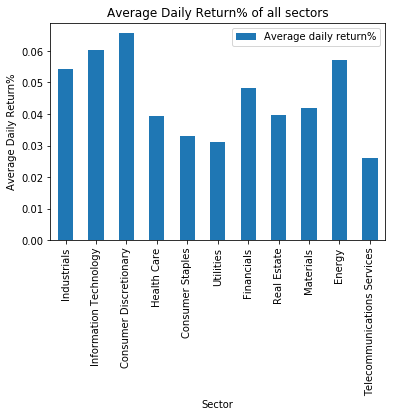

In [18]:
#Creating a dataframe containg average daily return of each sector and plotting them using a bar plot.

Sectors_mean = [Industrials_returns.mean(), Information_Technology_returns.mean(), Consumer_Discretionary_returns.mean(), Health_Care_returns.mean(), Consumer_Staples_returns.mean(), Utilities_returns.mean(), Financials_returns.mean(), Real_Estate_returns.mean(), Materials_returns.mean(), Energy_returns.mean(), Telecommunications_Services_returns.mean()]
Sectors_mean = pd.DataFrame(Sectors_mean, columns=['Average daily return%'], index=name_of_sectors)
print(Sectors_mean)
Sectors_mean.plot.bar()
plt.xlabel('Sector')
plt.ylabel('Average Daily Return%')
plt.title("Average Daily Return% of all sectors")

It can be observed that top 5 sectors, in terms of maximum average daily return are Consumer Discretionary, Information Technology, Energy, Industrials and Financials.

                                      Average daily return%
Alphabet Inc Class A                               1.004740
Grainger (W.W.) Inc.                               0.942774
Ulta Salon Cosmetics & Fragrance Inc               0.611565
Chipotle Mexican Grill                             0.578257
Cabot Oil & Gas                                    0.507964


Text(0.5,1,'Average Daily Return% of top 5 stocks')

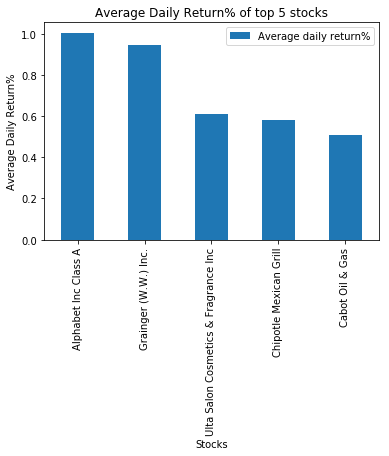

In [19]:
#Creating a dataframe containg average daily return of top 5 stocks and plotting them using a bar plot.

Selected_stocks_mean = [Information_Technology_returns_5[0], Industrials_returns_5[0], Consumer_Discretionary_returns_5[0], Consumer_Discretionary_returns_5[1], Energy_returns_5[0]]
Selected_stocks_names = [Information_Technology_returns_5.index[0], Industrials_returns_5.index[0], Consumer_Discretionary_returns_5.index[0], Consumer_Discretionary_returns_5.index[1], Energy_returns_5.index[0]]
Selected_stocks_mean = pd.DataFrame(Selected_stocks_mean, columns=['Average daily return%'], index=Selected_stocks_names)
print(Selected_stocks_mean)
Selected_stocks_mean.plot.bar()
plt.xlabel('Stocks')
plt.ylabel('Average Daily Return%')
plt.title("Average Daily Return% of top 5 stocks")

# Creating dataframes for top 5 sectors, containing the close price of top 5 stocks in each sector and finding correlation between the sectors and the stocks.

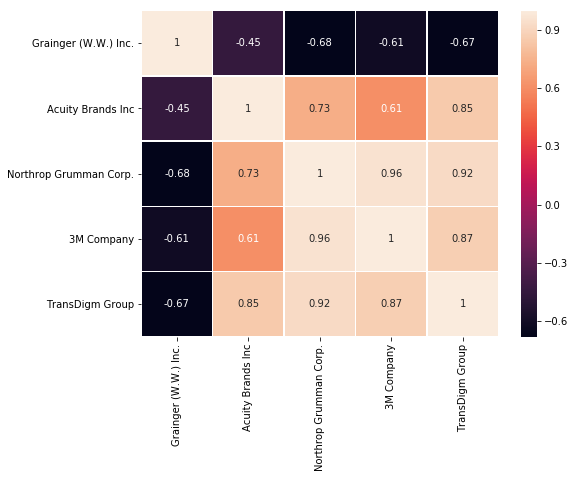

In [20]:
#Industrials top 5 stocks

Grainger_Inc = Industrials.loc[Industrials.Security == 'Grainger (W.W.) Inc.', ['date','close']]
Grainger_Inc = Grainger_Inc.rename(index=str, columns = {"close" : "Grainger (W.W.) Inc."})

Acuity_Brands_Inc = Industrials.loc[Industrials.Security == 'Acuity Brands Inc', ['date','close']]
Acuity_Brands_Inc = Acuity_Brands_Inc.rename(index=str, columns = {"close" : "Acuity Brands Inc"})   

Northrop_Grumman_Corp = Industrials.loc[Industrials.Security == 'Northrop Grumman Corp.', ['date','close']]
Northrop_Grumman_Corp = Northrop_Grumman_Corp.rename(index=str, columns = {"close" : "Northrop Grumman Corp."})

ThreeM_Company = Industrials.loc[Industrials.Security == '3M Company', ['date','close']]
ThreeM_Company = ThreeM_Company.rename(index=str, columns = {"close" : "3M Company"})

TransDigm_Group = Industrials.loc[Industrials.Security == 'TransDigm Group', ['date','close']]
TransDigm_Group = TransDigm_Group.rename(index=str, columns = {"close" : "TransDigm Group"})

Industrials_Top5 = Grainger_Inc.merge(Acuity_Brands_Inc,on='date').merge(Northrop_Grumman_Corp,on='date').merge(ThreeM_Company,on='date').merge(TransDigm_Group,on='date')
correlation_matrix_Industrials = Industrials_Top5.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix_Industrials, annot=True, linewidths=.5)

Except Grainger (W.W.) Inc, correlation between the stocks within Industrials sectors is strong.

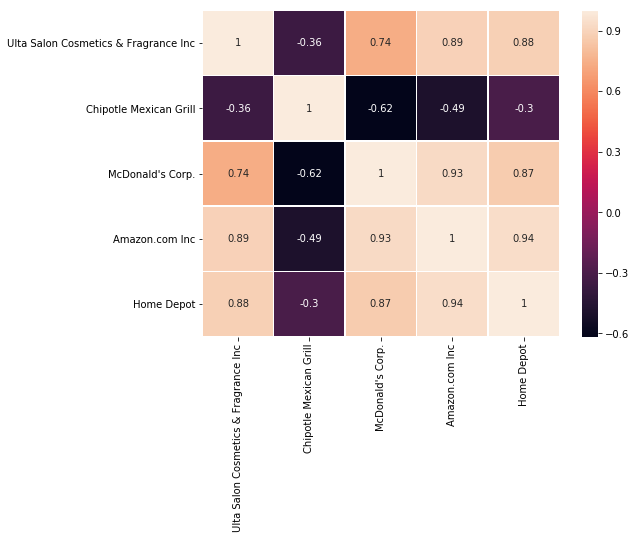

In [21]:
#Consumer Discretionary top 5 stocks

Ulta_Salon = Consumer_Discretionary.loc[Consumer_Discretionary.Security == 'Ulta Salon Cosmetics & Fragrance Inc', ['date','close']]
Ulta_Salon = Ulta_Salon.rename(index=str, columns = {"close" : "Ulta Salon Cosmetics & Fragrance Inc"})

Chipotle_Mexican_Grill = Consumer_Discretionary.loc[Consumer_Discretionary.Security == 'Chipotle Mexican Grill', ['date','close']]
Chipotle_Mexican_Grill = Chipotle_Mexican_Grill.rename(index=str, columns = {"close" : "Chipotle Mexican Grill"})

Mc_Donalds = Consumer_Discretionary.loc[Consumer_Discretionary.Security == "McDonald's Corp.", ['date','close']]
Mc_Donalds = Mc_Donalds.rename(index=str, columns = {"close" : "McDonald's Corp."})

Amazon_com_Inc = Consumer_Discretionary.loc[Consumer_Discretionary.Security == 'Amazon.com Inc', ['date','close']]
Amazon_com_Inc = Amazon_com_Inc.rename(index=str, columns = {"close" : "Amazon.com Inc"})
                                            
Home_Depot = Consumer_Discretionary.loc[Consumer_Discretionary.Security == 'Home Depot', ['date','close']]
Home_Depot = Home_Depot.rename(index=str, columns = {"close" : "Home Depot"})

Consumer_Discretionary_Top5 = Ulta_Salon.merge(Chipotle_Mexican_Grill,on='date').merge(Mc_Donalds,on='date').merge(Amazon_com_Inc,on='date').merge(Home_Depot,on='date')
correlation_matrix_Consumer_Discretionary = Consumer_Discretionary_Top5.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix_Consumer_Discretionary, annot=True, linewidths=.5)

Except Chipotle Mexican Grill, all other stocks are strongly positively correlated.

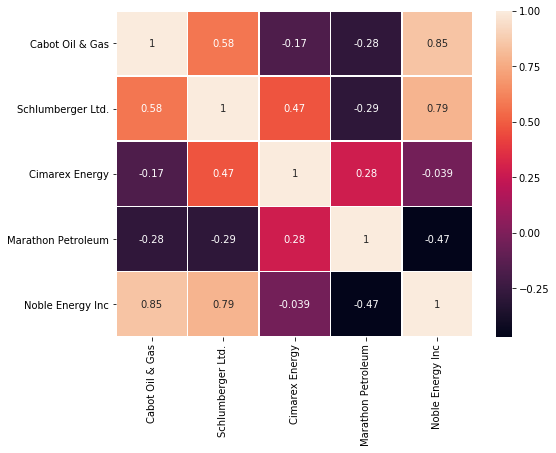

In [22]:
#Energy top 5 stocks

Cabot_Oil_Gas = Energy.loc[Energy.Security == 'Cabot Oil & Gas', ['date','close']]
Cabot_Oil_Gas = Cabot_Oil_Gas.rename(index=str, columns = {"close" : "Cabot Oil & Gas"})

Schlumberger_Ltd = Energy.loc[Energy.Security == 'Schlumberger Ltd.', ['date','close']]
Schlumberger_Ltd = Schlumberger_Ltd.rename(index=str, columns = {"close" : "Schlumberger Ltd."})

Cimarex_Energy = Energy.loc[Energy.Security == 'Cimarex Energy', ['date','close']]
Cimarex_Energy = Cimarex_Energy.rename(index=str, columns = {"close" : "Cimarex Energy"}) 

Marathon_Petroleum = Energy.loc[Energy.Security == 'Marathon Petroleum', ['date','close']]
Marathon_Petroleum = Marathon_Petroleum.rename(index=str, columns = {"close" : "Marathon Petroleum"})

Noble_Energy_Inc = Energy.loc[Energy.Security == 'Noble Energy Inc', ['date','close']]
Noble_Energy_Inc = Noble_Energy_Inc.rename(index=str, columns = {"close" : "Noble Energy Inc"})

Energy_Top5 = Cabot_Oil_Gas.merge(Schlumberger_Ltd,on='date').merge(Cimarex_Energy,on='date').merge(Marathon_Petroleum,on='date').merge(Noble_Energy_Inc,on='date')
correlation_matrix_Energy = Energy_Top5.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix_Energy, annot=True, linewidths=.5)

Stocks of Energy sector are not correlated with each other.

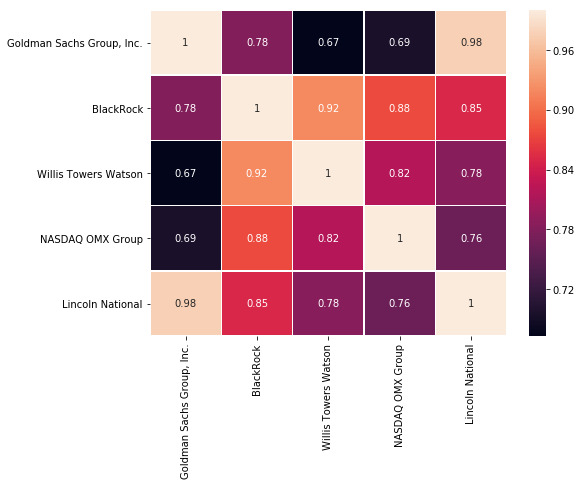

In [23]:
#Financials top 5 stocks

Goldman_Sachs_Group = Financials.loc[Financials.Security == 'Goldman Sachs Group', ['date','close']]
Goldman_Sachs_Group = Goldman_Sachs_Group.rename(index=str, columns = {"close" : "Goldman Sachs Group, Inc."})

BlackRock = Financials.loc[Financials.Security == 'BlackRock', ['date','close']]
BlackRock = BlackRock.rename(index=str, columns = {"close" : "BlackRock"}) 

Willis_Towers_Watson = Financials.loc[Financials.Security == 'Willis Towers Watson', ['date','close']]
Willis_Towers_Watson = Willis_Towers_Watson.rename(index=str, columns = {"close" : "Willis Towers Watson"})

NASDAQ_OMX_Group = Financials.loc[Financials.Security == 'NASDAQ OMX Group', ['date','close']]
NASDAQ_OMX_Group = NASDAQ_OMX_Group.rename(index=str, columns = {"close" : "NASDAQ OMX Group"})

Lincoln_National = Financials.loc[Financials.Security == 'Lincoln National', ['date','close']]
Lincoln_National = Lincoln_National.rename(index=str, columns = {"close" : "Lincoln National"})

Financials_Top5 = Goldman_Sachs_Group.merge(BlackRock,on='date').merge(Willis_Towers_Watson,on='date').merge(NASDAQ_OMX_Group,on='date').merge(Lincoln_National,on='date')
correlation_matrix_Financials = Financials_Top5.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix_Financials, annot=True, linewidths=.5)

There is strong correlation between stocks of Financials sector.

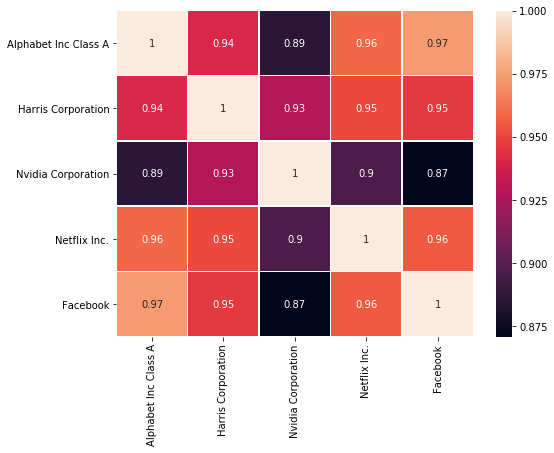

In [24]:
#Information Technology top 5 stocks

Alphabet_Inc_Class_A = Information_Technology.loc[Information_Technology.Security == 'Alphabet Inc Class A', ['date','close']]
Alphabet_Inc_Class_A = Alphabet_Inc_Class_A.rename(index=str, columns = {"close" : "Alphabet Inc Class A"})

Harris_Corporation = Information_Technology.loc[Information_Technology.Security == 'Harris Corporation', ['date','close']]
Harris_Corporation = Harris_Corporation.rename(index=str, columns = {"close" : "Harris Corporation"})

Nvidia_Corporation = Information_Technology.loc[Information_Technology.Security == 'Nvidia Corporation', ['date','close']]
Nvidia_Corporation = Nvidia_Corporation.rename(index=str, columns = {"close" : "Nvidia Corporation"})

Netflix_Inc = Information_Technology.loc[Information_Technology.Security == 'Netflix Inc.', ['date','close']]
Netflix_Inc = Netflix_Inc.rename(index=str, columns = {"close" : "Netflix Inc."})

Facebook = Information_Technology.loc[Information_Technology.Security == 'Facebook', ['date','close']]
Facebook = Facebook.rename(index=str, columns = {"close" : "Facebook"}) 

Information_Technology_Top5 = Alphabet_Inc_Class_A.merge(Harris_Corporation,on='date').merge(Nvidia_Corporation,on='date').merge(Netflix_Inc,on='date').merge(Facebook,on='date')
correlation_matrix_Information_Technology = Information_Technology_Top5.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix_Information_Technology, annot=True, linewidths=.5)

Stocks IT sector are strongly correlated with each other

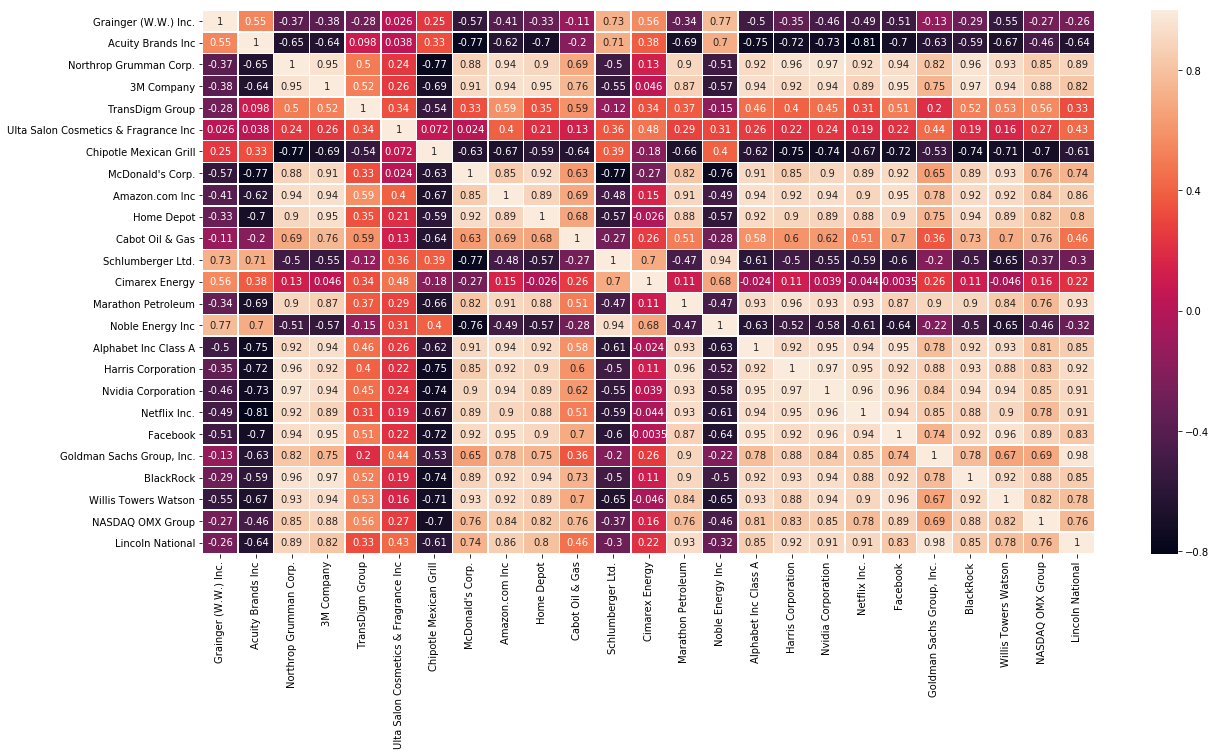

In [25]:
#Merging the five selected sectors, containing close price of top 5 performing stocks in each sector 

Portfolio_of_5sectors_returns = Industrials_Top5.merge(Consumer_Discretionary_Top5,on='date').merge(Energy_Top5,on='date').merge(Information_Technology_Top5,on='date').merge(Financials_Top5,on='date')

#Finding correlation between the stocks and also between the sectors
Portfolio_correlation_matrix = Portfolio_of_5sectors_returns.corr()
plt.figure(figsize = (20,10))
sns.heatmap(Portfolio_correlation_matrix, annot=True, linewidths=.5)

Information Technology and Financials sectors are strongly positively correlated with each other. Some of the other stocks from Industrials and Consumer Discretionary sectors are also strongly correlated with Information Technology and Financials sectors.

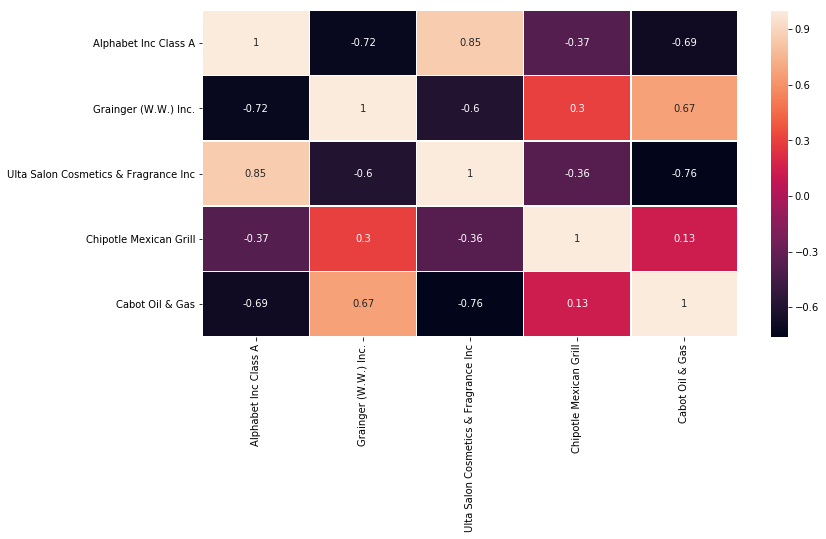

In [26]:
#Forming a dataframe of top 5 selected stocks, containing their close price
Selected_portfolio_5stocks = Alphabet_Inc_Class_A.merge(Grainger_Inc,on='date').merge(Ulta_Salon,on='date').merge(Chipotle_Mexican_Grill,on='date').merge(Cabot_Oil_Gas,on='date')

#Finding correlation between the 5 selected stocks
Selected_portfolio_correlation_matrix = Selected_portfolio_5stocks.corr()
plt.figure(figsize = (12,6))
sns.heatmap(Selected_portfolio_correlation_matrix, annot=True, linewidths=.5)

From the correlation matrix, it can be seen that the stocks are negatively correlated, except Ulta Salon and Alphabet. 
In order to build a diversified portfolio, it is essential that the stocks are not correlated. This helps in reducing the risk of loss in the portfolio.

# Creating a dataframe containing  'cumulative returns' of selected top 5 stocks and plotting their returns against S&P index return. 


In [27]:
Alphabet_Inc_Class_A_cumm_return = pd.DataFrame(Alphabet_Inc_Class_A.iloc[:,1].pct_change())
Alphabet_Inc_Class_A_cumm_return = Alphabet_Inc_Class_A_cumm_return.dropna()
Alphabet_Inc_Class_A_cumm_return = ((1 + Alphabet_Inc_Class_A_cumm_return).cumprod() - 1)


Grainger_Inc_cumm_return = Grainger_Inc.iloc[:,1].pct_change()
Grainger_Inc_cumm_return = Grainger_Inc_cumm_return.dropna()
Grainger_Inc_cumm_return = ((1 + Grainger_Inc_cumm_return).cumprod() - 1)

Ulta_Salon_cumm_return = Ulta_Salon.iloc[:,1].pct_change()
Ulta_Salon_cumm_return = Ulta_Salon_cumm_return.dropna()
Ulta_Salon_cumm_return = ((1 + Ulta_Salon_cumm_return).cumprod() - 1)


Chipotle_Mexican_Grill_cumm_return = Chipotle_Mexican_Grill.iloc[:,1].pct_change()
Chipotle_Mexican_Grill_cumm_return = Chipotle_Mexican_Grill_cumm_return.dropna()
Chipotle_Mexican_Grill_cumm_return = ((1 + Chipotle_Mexican_Grill_cumm_return).cumprod() - 1)

Cabot_Oil_Gas_cumm_return = Cabot_Oil_Gas.iloc[:,1].pct_change()
Cabot_Oil_Gas_cumm_return = Cabot_Oil_Gas_cumm_return.dropna()
Cabot_Oil_Gas_cumm_return = ((1 + Cabot_Oil_Gas_cumm_return).cumprod() - 1)

# Importing S&P index data to compare the return of 5 stocks with S&P index return

In [28]:
#Importing S&P index data and sorting by 'Date'
SnP = pd.read_csv('SPIndex.csv', parse_dates=['Date'])
SnP = SnP.sort_values(by='Date')
print(SnP.head())
print(SnP.tail())
SnP.info()

        Date         open         high          low        close     adjclose  \
0 2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
1 2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2 2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
3 2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
4 2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   

       volume  
0   931800000  
1  1009000000  
2  1085500000  
3  1092300000  
4  1225200000  
           Date         open         high          low        close  \
4506 2017-11-29  2627.820068  2634.889893  2620.320068  2626.070068   
4507 2017-11-30  2633.929932  2657.739990  2633.929932  2647.580078   
4508 2017-12-01  2645.100098  2650.620117  2605.520020  2642.219971   
4509 2017-12-04  2657.189941  2665.189941  2639.030029  2639.439941   
4510 2017-12-05  2639.780029  2648.719971  2627.729980  2629.5

The data frame SnP contains data for S&P index from January 2000 to December 2017. There are 4511 non-null values.

In [29]:
#Selecting data between February 2013 and December 2017 to match the dates with that of Stockprices data 
SnP = SnP[(SnP['Date'] >= '2013-02-01') & (SnP['Date'] <= '2017-12-31')]
SnP = SnP.sort_values(by='Date')
SnP = SnP.reset_index(drop=True)
SnP = SnP.drop(columns = {'Date','open', 'high', 'low', 'close', 'volume'})
SnP['Returns'] = SnP['adjclose'].pct_change()
SnP = SnP.dropna()

#Calculating cummulative returns of S&P index
SnP['Cummulative_returns'] = ((1+SnP['Returns']).cumprod()-1)
SnP = SnP.drop(columns = {'adjclose','Returns'})
print(SnP.head())

   Cummulative_returns
1            -0.011539
2            -0.001242
3            -0.000694
4            -0.002498
5             0.003146


Selected data between period starting from February 2013 and ending December 2017 to match it with the period of stocks data. Dropped the columns that are not required. Calculated daily return and cummulative return over the selected period. 

<Figure size 1296x648 with 0 Axes>

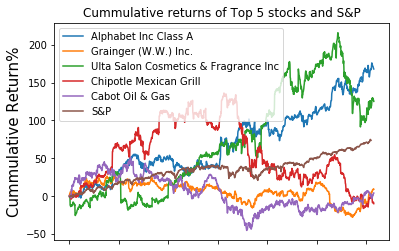

In [30]:
plt.figure(figsize = (18,9))
(Alphabet_Inc_Class_A_cumm_return*100).plot()
(Grainger_Inc_cumm_return*100).plot()
(Ulta_Salon_cumm_return*100).plot()
(Chipotle_Mexican_Grill_cumm_return*100).plot()
(Cabot_Oil_Gas_cumm_return*100).plot()
(SnP['Cummulative_returns']*100).plot(label='S&P')
plt.ylabel('Cummulative Return%', fontsize=15)
plt.legend()
plt.title('Cummulative returns of Top 5 stocks and S&P')
plt.show()

# Machine learning for Modern Portfolio Theory

In [31]:
#Examining the selected portfolio
print(Selected_portfolio_5stocks.info())
Selected_portfolio_5stocks = Selected_portfolio_5stocks.set_index('date')
print(Selected_portfolio_5stocks.head())
print(Selected_portfolio_5stocks.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 6 columns):
date                                    1233 non-null datetime64[ns]
Alphabet Inc Class A                    1233 non-null float64
Grainger (W.W.) Inc.                    1233 non-null float64
Ulta Salon Cosmetics & Fragrance Inc    1233 non-null float64
Chipotle Mexican Grill                  1233 non-null float64
Cabot Oil & Gas                         1233 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 67.4 KB
None
            Alphabet Inc Class A  Grainger (W.W.) Inc.  \
date                                                     
2013-02-08              393.0777                216.71   
2013-02-11              391.6012                217.61   
2013-02-12              390.7403                223.09   
2013-02-13              391.8214                225.62   
2013-02-14              394.3039                226.29   

            Ulta Salon Cosmetics & Fragranc

In [32]:
#Resampling the full dataframe to monthly timeframe
monthly_Selected_portfolio = Selected_portfolio_5stocks.resample('BMS').first()

#Calculating daily returns of stocks
returns_daily = Selected_portfolio_5stocks.pct_change()

#Calculating monthly returns of the stocks
returns_monthly = monthly_Selected_portfolio.pct_change().dropna()

Daily stock prices are resampled and converted into monthly prices

In [33]:
#Daily covariance of stocks (for each monthly period)
covariances = {}
for i in returns_monthly.index:
    rtd_idx = returns_daily.index
    
    #Masking daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    #Using the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

                                      Alphabet Inc Class A  \
Alphabet Inc Class A                              0.000061   
Grainger (W.W.) Inc.                             -0.000020   
Ulta Salon Cosmetics & Fragrance Inc              0.000008   
Chipotle Mexican Grill                           -0.000016   
Cabot Oil & Gas                                  -0.000020   

                                      Grainger (W.W.) Inc.  \
Alphabet Inc Class A                             -0.000020   
Grainger (W.W.) Inc.                              0.000220   
Ulta Salon Cosmetics & Fragrance Inc              0.000142   
Chipotle Mexican Grill                            0.000040   
Cabot Oil & Gas                                   0.000026   

                                      Ulta Salon Cosmetics & Fragrance Inc  \
Alphabet Inc Class A                                              0.000008   
Grainger (W.W.) Inc.                                              0.000142   
Ulta Salon Cosmetics

In [34]:
#Portfolio weights, i.e. the weightage of each of the 5 stocks in the portfolio, are calculated

portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

#Getting portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(10):
        weights = np.random.random(5)
        weights /= np.sum(weights) 
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)
        
print(portfolio_weights[date][0])

[0.22816081 0.18445328 0.15390195 0.27557026 0.1579137 ]


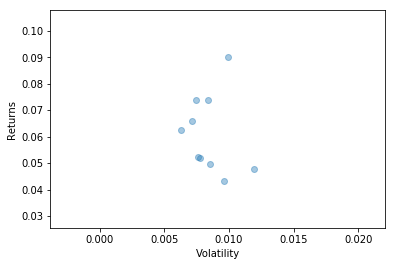

In [35]:
#Getting latest date of available data
date = sorted(covariances.keys())[-1]  

#Plotting efficient frontier
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date], alpha=0.4)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

Often the efficient frontier will be a bullet shape, but if the returns are all positive then it may look like this.

In [36]:
#Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

#Looping through dates and getting sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
        #Dividing returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    #Getting the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

0.045712361656079004


Sharpe ratio is found by dividing return by volatility(risk). 
A positive Sharpe ratio means positive excess return. Excess return is the return on the portfolio less risk-free rate.

In [37]:
#Calculating exponentially-weighted moving average (ewma) of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

#Resampling daily returns to first business day of the month with average for that month
ewma_monthly = ewma_daily.resample('BMS').first()


#Shifting ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(30).dropna()

print(ewma_monthly.iloc[-1])

print(ewma_monthly.head())
print(ewma_monthly.shape)

Alphabet Inc Class A                   -0.000010
Grainger (W.W.) Inc.                   -0.000923
Ulta Salon Cosmetics & Fragrance Inc    0.000738
Chipotle Mexican Grill                 -0.002084
Cabot Oil & Gas                         0.000669
Name: 2017-12-01 00:00:00, dtype: float64
            Alphabet Inc Class A  Grainger (W.W.) Inc.  \
date                                                     
2015-08-03             -0.003756              0.004153   
2015-09-01              0.002169              0.002847   
2015-10-01             -0.000580             -0.001288   
2015-11-02              0.001646              0.001930   
2015-12-01              0.000559              0.001824   

            Ulta Salon Cosmetics & Fragrance Inc  Chipotle Mexican Grill  \
date                                                                       
2015-08-03                             -0.001309                0.008855   
2015-09-01                             -0.004901                0.000914   
20

EWMAs were created and resampled into monthly time frame

In [38]:
targets, features = [], []

#Creating features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():

    #Getting the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # adding ewma to features

targets = np.array(targets)
features = np.array(features)

print(features[-5:])
print(targets[-5:])

[[ 1.34303100e-03 -6.12701116e-04  4.67605241e-04  1.56917090e-03
  -3.54517432e-03]
 [ 4.45272571e-03  4.55902759e-05  4.03264572e-03 -6.74648947e-04
   2.04719107e-03]
 [-9.11203835e-04 -1.10362031e-03  2.39808091e-03 -1.68339857e-03
   3.36965757e-03]
 [-1.49350610e-04  2.16256847e-03  1.27902646e-03 -2.24613495e-03
   4.92040372e-03]
 [-9.95358397e-06 -9.22955430e-04  7.38372336e-04 -2.08400711e-03
   6.69129016e-04]]
[[0.36623737 0.07118018 0.03572533 0.07663728 0.45021984]
 [0.12475318 0.15754682 0.08202631 0.22341043 0.41226326]
 [0.1433608  0.29829534 0.23381428 0.04028827 0.2842413 ]
 [0.09621206 0.40469293 0.00994355 0.14713164 0.34201982]
 [0.237647   0.31106664 0.08359324 0.25628547 0.11140765]]


EWMAs are taken as features and targets are the portfolios with highest Sharpe ratio.

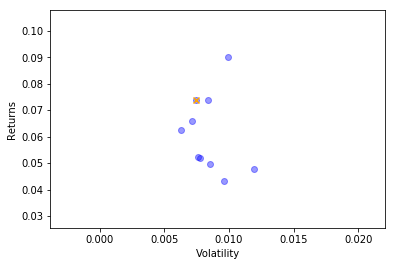

In [39]:
#Getting most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

#Ploting efficient frontier with sharpe ratio as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.4, color='blue')
best_idx = max_sharpe_idxs[date]

#Placing an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

The point with an orange 'x' is the best efficient frontier with greatest sharpe ratio.

In [40]:
#importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Forming train and test features
train_size = int(0.85 * features.shape[0])

train_features = features[:train_size]
train_targets = targets[:train_size]
test_features = features[train_size:]
test_targets = targets[train_size:]

# Random Hyperparameter Grid

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4]}


# Random Search Training

In [42]:
# Using the random grid to search for best hyperparameters
# First creating the base model to tune
rf = RandomForestRegressor()

# Random searching of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=25, n_jobs = -1)

# Fitting the random search model
rf_random.fit(train_features, train_targets)
print("Train score:", rf_random.score(train_features, train_targets))
print("Test score:", rf_random.score(test_features, test_targets))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] min_samples_split=5, n_estimators=1400, max_depth=10, min_samples_leaf=4, bootstrap=False 
[CV] min_samples_split=5, n_estimators=1400, max_depth=10, min_samples_leaf=4, bootstrap=False 
[CV] min_samples_split=5, n_estimators=1400, max_depth=10, min_samples_leaf=4, bootstrap=False 
[CV] min_samples_split=5, n_estimators=1800, max_depth=40, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, n_estimators=1400, max_depth=10, min_samples_leaf=4, bootstrap=False, total=   4.2s
[CV] min_samples_split=5, n_estimators=1800, max_depth=40, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, n_estimators=1400, max_depth=10, min_samples_leaf=4, bootstrap=False, total=   4.2s
[CV] min_samples_split=5, n_estimators=1800, max_depth=40, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=5, n_estimators=1400, max_depth=10, min_samples_leaf=4, bootstrap=False, total=   4.2s
[CV] min_samples_split=5, n_estim

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.3s


[CV]  min_samples_split=5, n_estimators=1600, max_depth=20, min_samples_leaf=4, bootstrap=True, total=   4.9s
[CV] min_samples_split=10, n_estimators=1600, max_depth=110, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, n_estimators=1600, max_depth=20, min_samples_leaf=4, bootstrap=True, total=   5.4s
[CV] min_samples_split=10, n_estimators=1600, max_depth=110, min_samples_leaf=1, bootstrap=True 
[CV]  min_samples_split=5, n_estimators=600, max_depth=100, min_samples_leaf=2, bootstrap=True, total=   2.3s
[CV] min_samples_split=2, n_estimators=1000, max_depth=40, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=2, n_estimators=1000, max_depth=40, min_samples_leaf=2, bootstrap=True, total=   2.9s
[CV] min_samples_split=2, n_estimators=1000, max_depth=40, min_samples_leaf=2, bootstrap=True 
[CV]  min_samples_split=10, n_estimators=1600, max_depth=110, min_samples_leaf=1, bootstrap=True, total=   5.1s
[CV] min_samples_split=2, n_estimators=1000, max_depth=40, min_s

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   48.9s finished


Train score: 0.31343306230527707
Test score: -0.7748241306534


The test score is not good, but it'll work out OK in this case.

In [43]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [44]:
#Defining a function to predict test features

def evaluate(model, test_features, test_targets):
    predictions = model.predict(test_features)
    

    errors = abs(predictions - test_targets)
  
    mape = 100 * np.mean(errors / test_targets)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 25)
base_model.fit(train_features, train_targets)
base_accuracy = evaluate(base_model, test_features, test_targets)

Model Performance
Average Error: 0.1433 degrees.
Accuracy = -57.06%.


The accuracy of model is very low. It is tried to improve in next steps.

In [45]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_targets)

Model Performance
Average Error: 0.1220 degrees.
Accuracy = -51.00%.


The accuracy has improved with random training

In [46]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / abs(base_accuracy)))

Improvement of 10.62%.


# Grid Search with Cross Validation

In [47]:
from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 1, 2],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [6, 7, 8],
    'min_samples_split': [6, 7, 8],
    'n_estimators': [5, 10, 15]
}
#Create a base model
rf = RandomForestRegressor()
#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [48]:
# Fit the grid search to the data
grid_search.fit(train_features, train_targets)

#Finding the best parameters
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None, total=   0.0s
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None, total=   0.0s
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV] max_f

[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=6, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=5,

[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=None, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=8, max_depth=None 
[CV]  max_features=1, bootstrap=True, n_estimators=5, m

[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=None, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=6, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=None, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=6, max_depth=None, total=   0.0s
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=6, max_depth=None, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=5, mi

[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    2.3s


[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=7, max_depth=None, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=7, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=7, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=10

[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=None, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=None, total=   0.0s
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=8, max_depth=None 
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=6, max_depth=None 
[CV]  max_features=2, bootstrap=True, n_estimators=15, 

[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=None, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=None, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=None, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=15, 

[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=7, max_depth=None, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=8, max_depth=None, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=8, max_depth=None, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV]  max_features=3, bootstrap=True, n_estimators=5, 

[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=6, max_depth=1, total=   0.1s
[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=6, max_depth=1, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=6, max_depth=1 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=1, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=6, max_depth=1 
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=1 
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=1 
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=1, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min

[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=8, max_depth=1 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=1, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=8, max_depth=1 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=7, max_depth=1, total=   0.1s
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=8, max_depth=1, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=7, max_depth=1 
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=8, max_depth=1 
[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=8, max_depth=1, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min

[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=6, max_depth=1, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=6, max_depth=1 
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=6, max_depth=1 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=8, max_depth=1, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=1 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=6, max_depth=1, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=6, max_depth=1 
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=6, max_depth=1, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_

[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=1 
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=7, max_depth=1, total=   0.1s
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=7, max_depth=1, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=7, max_depth=1 
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=7, max_depth=1 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=1, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=8, max_depth=1 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=8, max_depth=1, total=   0.0s
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min

[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=8, max_depth=1 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=1, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=6, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_depth=1, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=1, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=6, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=6, max_depth=1, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_

[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=6, max_depth=1, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=1 
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=1, total=   0.1s
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=1, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=1 
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=7, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=1, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min

[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=1, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=8, max_depth=1, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=8, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=8, max_depth=1, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=8, max_depth=1 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=1, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_s

[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_depth=2, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=2 
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_depth=2 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=2, total=   0.1s
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=2, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=2 
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=2 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=6, max_depth=2, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_

[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=8, max_depth=2 
[CV]  max_features=1, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=7, max_depth=2, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=2 
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=8, max_depth=2, total=   0.0s
[CV]  max_features=1, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=8, max_depth=2, total=   0.1s
[CV] max_features=1, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2 
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=8, max_depth=2 
[CV]  max_features=1, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2, total=   0.0s
[CV] max_features=1, bootstrap=True, n_estimators=10, min_samples_split=8, min_

[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=6, max_depth=2, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=6, max_depth=2 
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=6, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=2, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=6, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=6, max_depth=2, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=6, max_depth=2, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min

[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:   12.4s


[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=7, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=7, max_depth=2, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=7, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=2, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=7, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=2, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=7, max_depth=2, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_s

[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=6, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=8, max_depth=2, total=   0.1s
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=2, total=   0.0s
[CV] max_features=2, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=8, max_depth=2 
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=2 
[CV]  max_features=2, bootstrap=True, n_estimators=15, min_samples_split=7, min_samples_leaf=8, max_depth=2, total=   0.1s
[CV] max_features=2, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=6, max_depth=2, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_s

[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=7, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=8, min_samples_leaf=6, max_depth=2, total=   0.2s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=2, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=7, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=6, min_samples_leaf=7, max_depth=2, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=7, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=6, min_samples_leaf=7, max_depth=2, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=15, min_samples_split=7, min_s

[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=10, min_samples_split=7, min_samples_leaf=8, max_depth=2, total=   0.1s
[CV]  max_features=3, bootstrap=True, n_estimators=15, min_samples_split=6, min_samples_leaf=8, max_depth=2, total=   0.1s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=8, min_samples_leaf=8, max_depth=2 
[CV] max_features=3, bootstrap=True, n_estimators=5, min_samples_split=7, min_samples_leaf=8, max_depth=2 
[CV]  max_features=3, bootstrap=True, n_estimators=5, min_samples_split=8, min_samples_leaf=8, max_depth=2, total=   0.0s
[CV] max_features=3, bootstrap=True, n_estimators=10, min_samples_split=8, min_sa

[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   15.7s finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 5}

In [49]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_targets)

Model Performance
Average Error: 0.1166 degrees.
Accuracy = -41.89%.


Accuracy has improved further

In [50]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / abs(base_accuracy)))

Improvement of 26.59%.


In [51]:
#Importing the S&P index data in a different variable, SandP_index
SandP_index = pd.read_csv('SPIndex.csv', parse_dates=['Date'])
SandP_index = SandP_index.sort_values(by='Date')
SandP_index = SandP_index[(SandP_index['Date'] >= '2013-02-01') & (SandP_index['Date'] <= '2017-12-31')]
SandP_index = SandP_index.drop(columns= {'open', 'high', 'low', 'close', 'volume'}) 
SandP_index = SandP_index.set_index('Date')
SandP_index = SandP_index.rename(columns={'adjclose' : 'SandP'})

#Resampling the full dataframe to monthly timeframe
SnP_index = SandP_index.resample('BMS').first()

#Calculating daily returns of stocks
returns_daily_SnP = SandP_index.pct_change()

#Calculating monthly returns of the stocks
returns_monthly_SnP = SnP_index.pct_change().dropna()

S&P index prices imported and resampled to monthly time frame

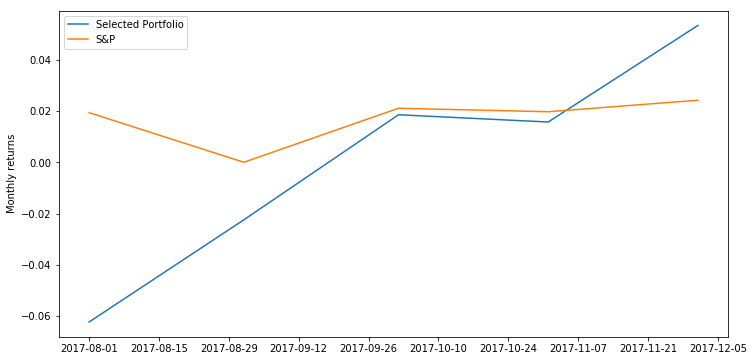

In [52]:
#Getting predictions from model on train and test
train_predictions = grid_search.predict(train_features)
test_predictions = grid_search.predict(test_features)

#To match the observation dates for returns_monthly for portfolio and S&P, and test_predictions 
returns_monthly_portfolio = returns_monthly[29:]
returns_monthly_SnP1 = returns_monthly_SnP[29:]


#Calculating and ploting returns from Random Forest predictions and the S&P returns
test_returns = np.sum(returns_monthly_portfolio.iloc[train_size:] * test_predictions, axis=1)
plt.figure(figsize=(12,6))
plt.plot(test_returns, label='Selected Portfolio')
plt.plot(returns_monthly_SnP1['SandP'].iloc[train_size:], label='S&P')
plt.ylabel('Monthly returns')
plt.legend()
plt.show()

These are the predicted returns of portfolio and actual return of S&P index. S&P index returns are found to be stable over the last 5 months (Aug 2017 to December 2017), wheereas portfolio's returns have fluctuated a lot during the same period.

In [53]:
#Calculating the effect of our portfolio selection on a hypothetical GBP 1k investment
cash = 1000
Portfolio_cash, SandP_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    Portfolio_cash.append(cash)

#Calculating performance for S&P index
cash = 1000  # reseting cash amount
for r in returns_monthly_SnP1['SandP'].iloc[train_size:]:
    cash *= 1 + r
    SandP_cash.append(cash)

print('Portfolio returns:', (Portfolio_cash[-1] - Portfolio_cash[0]) / Portfolio_cash[0])
print('S&P returns:', (SandP_cash[-1] - SandP_cash[0]) / SandP_cash[0])

Portfolio returns: -0.0007131326503887294
S&P returns: 0.08777648512037195


Return of portfolio over last five months is negative. Whereas, that of S&P index is more than 8%.

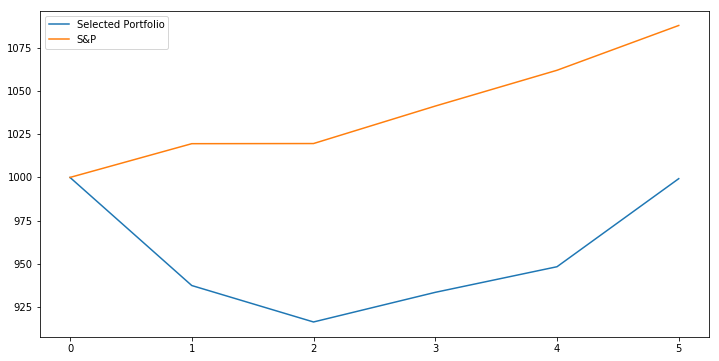

In [54]:
#Plot the Portfolio_cash and SandP_cash to compare overall returns
plt.figure(figsize=(12,6))
plt.plot(Portfolio_cash, label='Selected Portfolio')
plt.plot(SandP_cash, label='S&P')
plt.legend()  # show the legend
plt.show()

The graph shows that Selected portfolio gives a negative return of 0.07% on investment of GBP 1k, whereas, S&P index return on investment of GBP 1k is positive 8% in the last five months.